In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
df=pd.read_csv('Amazon Sale Report 2.csv',encoding= 'unicode_escape')

In [5]:
df.shape

(128976, 19)

In [6]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [7]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
128971,128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN
128975,128974,408-7436540-8728312,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN


In [8]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               10
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
#df.drop(['New' ,'PendingS'],axis=1, inplace= True)

In [11]:
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object   

In [14]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

# EDA


In [15]:
df['Size'].unique()

array(['S', '3XL', 'L', 'XS', '6XL', 'XXL', 'M', 'XL', 'Free', '5XL',
       '4XL'], dtype=object)

In [16]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [17]:
df['Size'].count()


37514

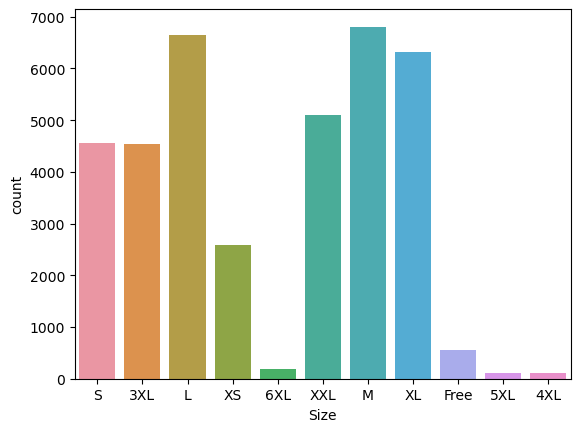

In [18]:
axx=sns.countplot(x='Size',data=df)

##### In the above countplot we see that mostly the people buys M size , follow by the L

In [19]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False
                                )

,Size,Qty
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


In [20]:
df.groupby(['Size'], as_index=True)['Qty'].sum()

Size
3XL     3972
4XL       93
5XL      104
6XL      170
Free     467
L       5795
M       5905
S       3896
XL      5481
XS      2191
XXL     4465
Name: Qty, dtype: int64

<Axes: xlabel='Size', ylabel='Qty'>

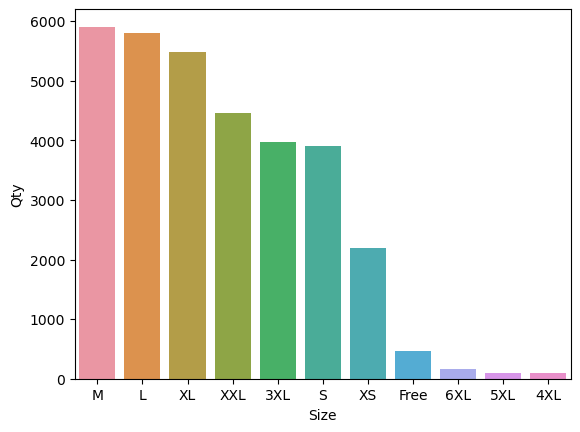

In [21]:
b=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
sns.barplot(x='Size', y="Qty", data=b)

##### from the above bar we see that most of the buys M size 

<Axes: xlabel='Courier Status', ylabel='count'>

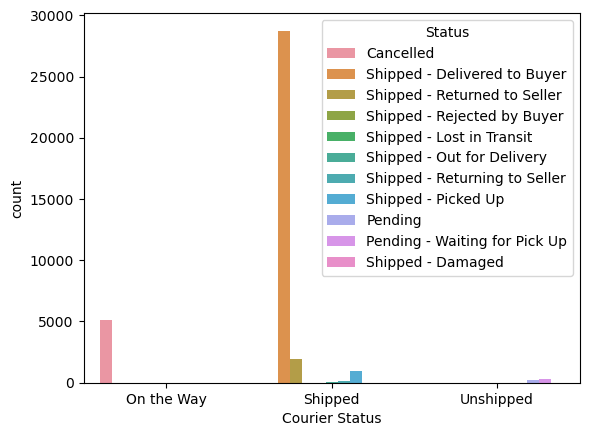

In [22]:

sns.countplot(x='Courier Status', data=df, hue='Status')


In [23]:
df['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Socks', 'Trousers', 'Wallet',
       'Perfume', 'Shoes'], dtype=object)

In [24]:
d=df.groupby(['Category'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)

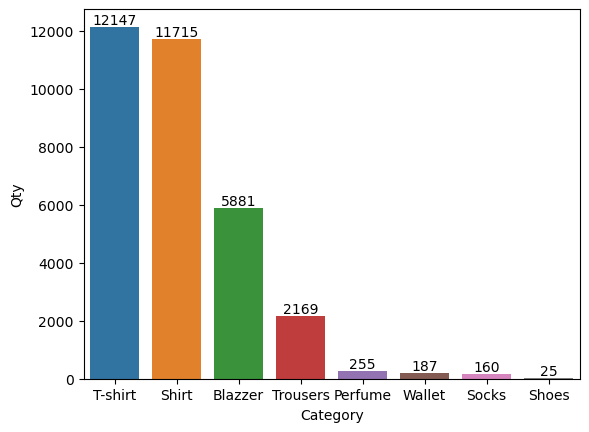

In [25]:
axx=sns.barplot(x='Category',y='Qty', data=d)
for bars in axx.containers:
    axx.bar_label(bars)

##### from above bar chart we can see that mostly customer buying  the T-shirt

In [26]:
df.groupby(['Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Category,Amount
5,T-shirt,11564206.65
2,Shirt,6121653.08
0,Blazzer,4940322.12
6,Trousers,1214335.30
1,Perfume,207672.66
7,Wallet,117047.18
4,Socks,64238.50
3,Shoes,25349.76


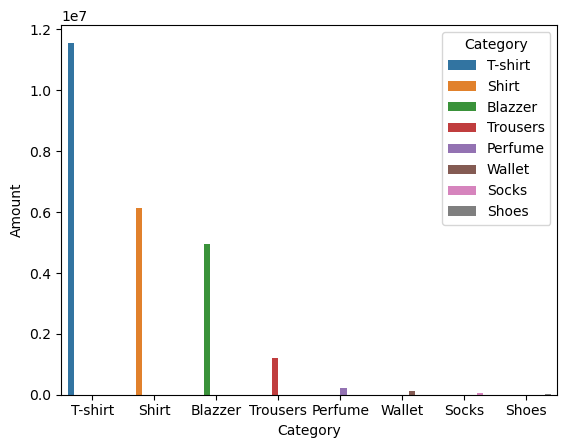

In [27]:
#plt.figure(figsize=(15,10))
d=df.groupby(['Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
axx=sns.barplot(x='Category', y='Amount', data=d, hue='Category')
#for bars in axx.containers:
   # axx.bar_label(bars)

  #####  from above chart we can see that T-Shirt generate more revenue 

In [28]:
df['ship-state'].value_counts().head(35)

RAJASTHAN            35626
MAHARASHTRA            365
KARNATAKA              267
TAMIL NADU             167
UTTAR PRADESH          157
TELANGANA              156
KERALA                 113
DELHI                   90
ANDHRA PRADESH          86
Gujarat                 72
HARYANA                 65
WEST BENGAL             60
MADHYA PRADESH          38
ASSAM                   34
BIHAR                   33
JHARKHAND               26
ODISHA                  23
PUNJAB                  19
UTTARAKHAND             16
CHHATTISGARH            16
HIMACHAL PRADESH        14
GOA                     13
JAMMU & KASHMIR         10
TRIPURA                  6
CHANDIGARH               6
PUDUCHERRY               5
ANDAMAN & NICOBAR        4
MEGHALAYA                4
DADRA AND NAGAR          3
NAGALAND                 3
MANIPUR                  3
Goa                      2
ARUNACHAL PRADESH        2
Meghalaya                2
SIKKIM                   1
Name: ship-state, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

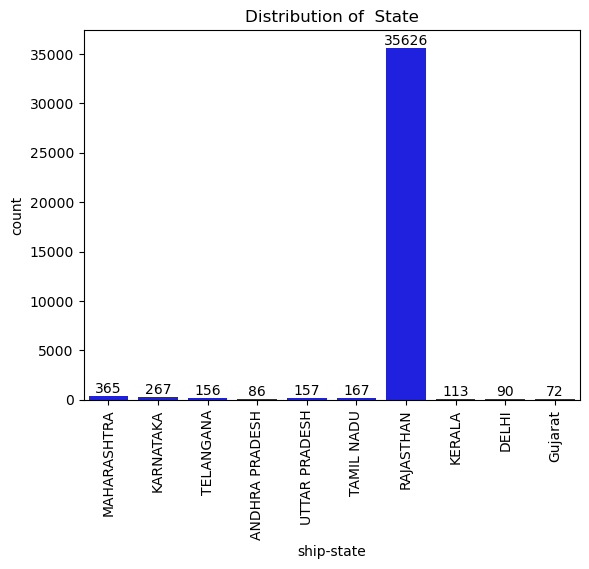

<Figure size 1200x600 with 0 Axes>

In [29]:
plt.title('Distribution of  State')
plt.xticks(rotation=90)
top_10_state=df['ship-state'].value_counts().head(10)
axx=sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state',color='blue')
plt.figure(figsize=(12, 6))
for bars in axx.containers:
    axx.bar_label(bars)    
plt.show
    

#####  Note- From above chart we can see that  most order come from the Rajasthan

In [30]:
df['B2B'].value_counts(normalize= True)

False    0.992376
True     0.007624
Name: B2B, dtype: float64

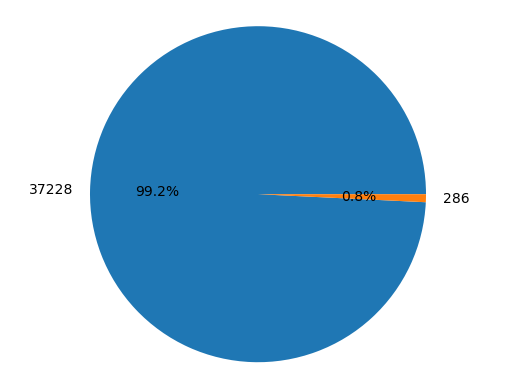

In [31]:
b2b = df['B2B'].value_counts()
plt.pie(b2b, labels=b2b, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

##### From above chart  we can see that max i.e. 99.3% of buyers are retailers and 0.7% are B2B buyers

# Conclusion


##### In this analysis of Amazon sales  data reveal that most buys from the Rajasthan state , most are the retailers , and the high demand of the T shirt and the perferred the M size.

In [32]:
''

''